# (what is behind bikes)
## by (Ebraam Maher)

## Investigation Overview

> the creation of this presention can make it easy to get the idea quickely about some interesting features related to "Ford Gobike System Data" data set by showing some visualization and brief interpretaion of it.

## Dataset Overview

> Ford GO bike system data set provides data of 3 categories:

1) time related data :whole trip durarion , start & end time

2)station related data : start & end stations name ,start & end stations location (latitude&longitude )

3)client's related data like date of birth, gender, user type (Subscriber or not).

dataset dimension (183412, 16) where it consists of 16 columns ( duration_sec start_time end_time start_station_id start_station_name start_station_latitude start_station_longitude end_station_id end_station_name end_station_latitude end_station_longitude bike_id user_type member_birth_year member_gender bike_share_for_all_trip)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

bike_data = bike_data[(bike_data.member_gender.isnull()==False)&(bike_data.start_station_name.isnull()==False)]
bike_data['end_station_id']= bike_data['end_station_id'].astype(str)
bike_data['start_station_id']= bike_data['start_station_id'].astype(str)
bike_data['bike_id']= bike_data['bike_id'].astype(str)

bike_data['start_time']=pd.to_datetime(bike_data['start_time'])
bike_data['end_time']=pd.to_datetime(bike_data['end_time'])

## dropping the rows with Erronous values of 'member_birth_year' column
bike_data = bike_data[bike_data.member_birth_year>=1920]


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)


> Here we try to investigate the data with respect to age of members comparing different ages’ count , it is 
obvious that the most common age lies between 25 and 35 years old members and and there is a few 
above 60 Years old

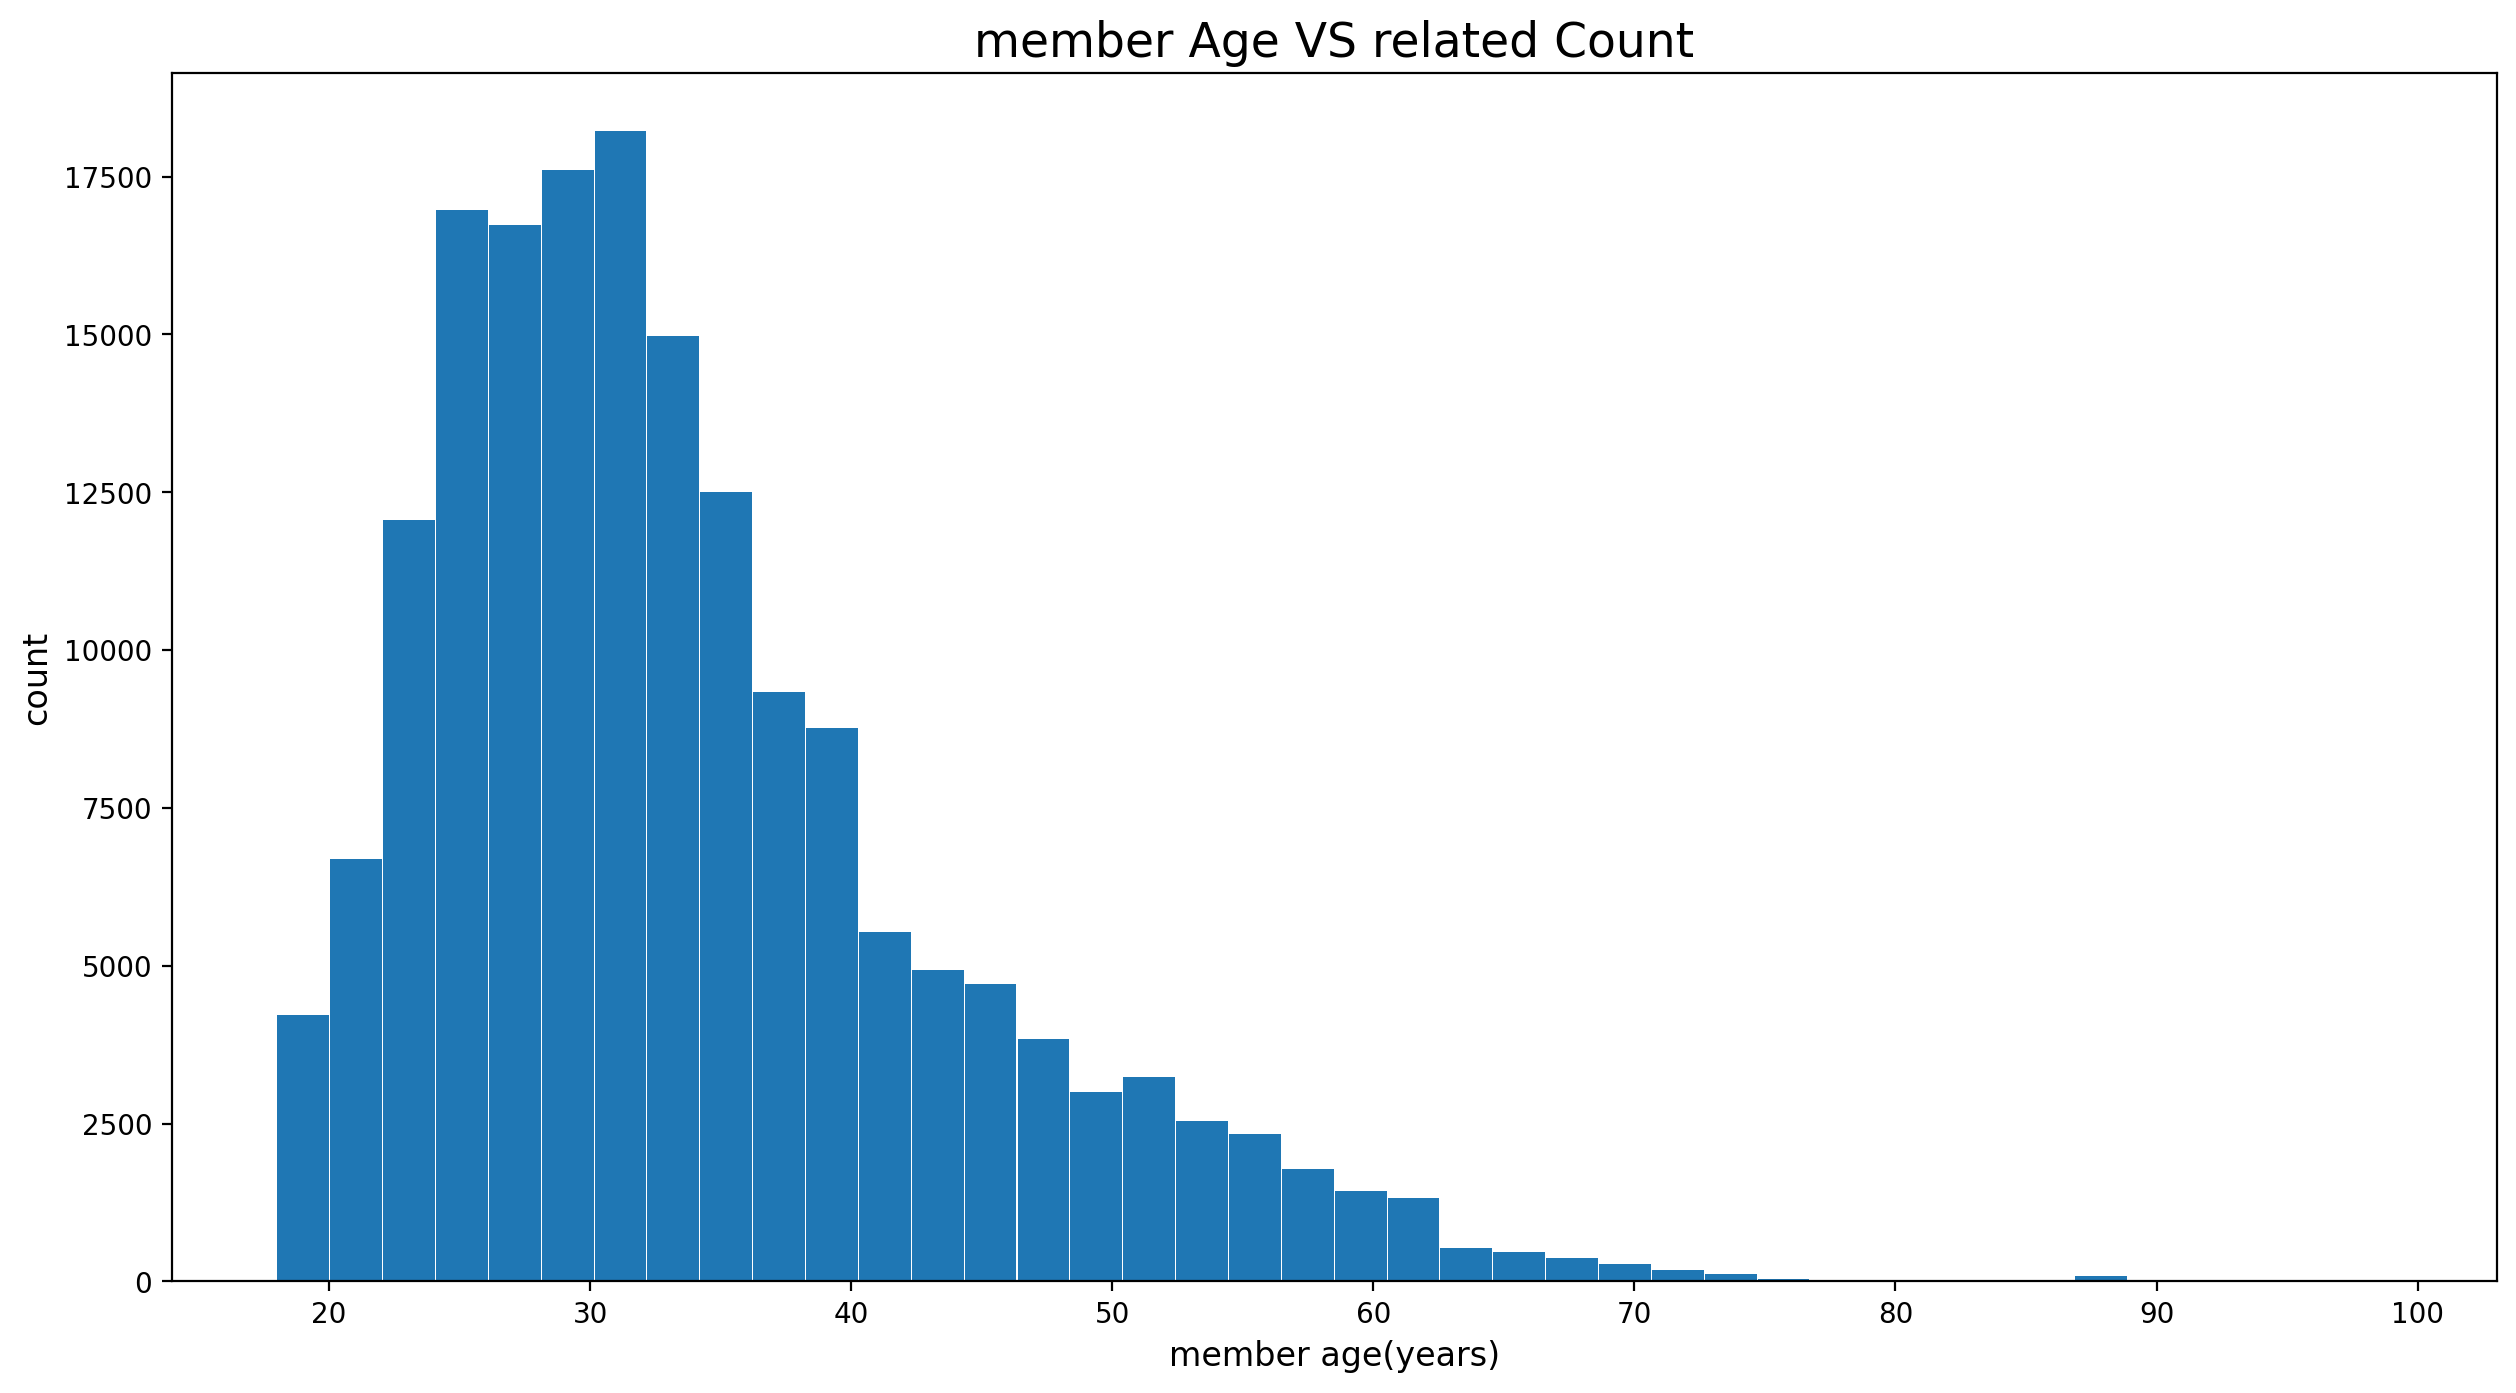

In [3]:
plt.figure(figsize=(15,8),dpi = 200);

plt.hist((2019-bike_data.member_birth_year),rwidth = 0.98,bins=40);

plt.title('member Age VS related Count',fontsize=17);
plt.xlabel('member age(years)',fontsize=12);
plt.ylabel('count',fontsize=12);



## (Visualization 2)

> Here we try to investigate the data with respect to members’ gender comparing the count for all genders,
we can see that Males are the dominant gender

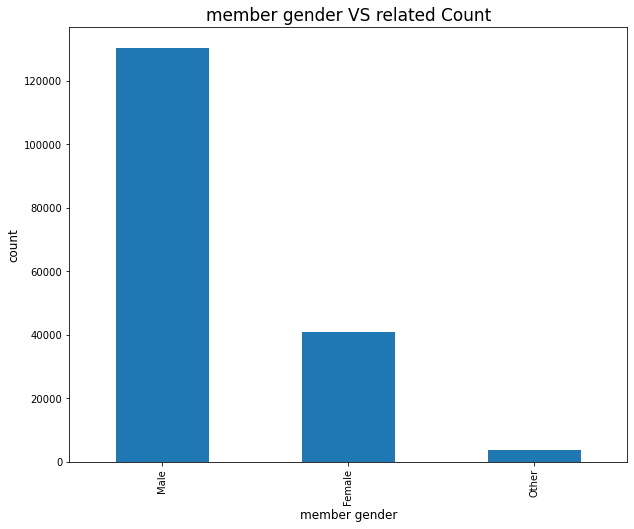

In [4]:
plt.figure(figsize=(10,8));

bike_data.member_gender.value_counts().plot(kind='bar');

plt.title('member gender VS related Count',fontsize=17);
plt.xlabel('member gender',fontsize=12);
plt.ylabel('count',fontsize=12);

## (Visualization 3)

>Here we shall see the relative relationship between user type and member gender by seeing the 
count for each pairs
it is clear that males tends to be subscribers compared to females

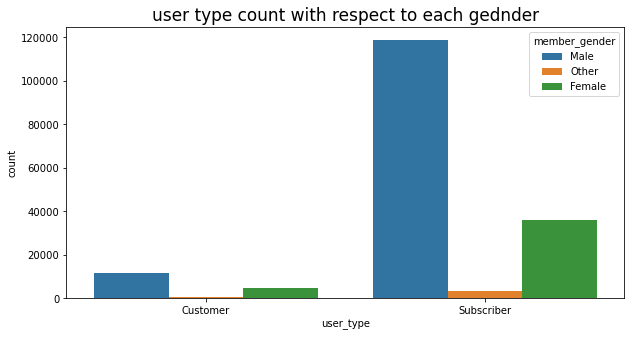

In [5]:
plt.figure(figsize=(10,5));

sb.countplot(data=bike_data, x='user_type', hue='member_gender');

plt.title('user type count with respect to each gednder',fontsize=17);

## (Visualization 4)

>Finally, here we can find the relationship between 3 features : start hour over the day, user type and trip 
duration 
we can observe that at any start hour over the day ,the customers are always have higher trip 
duration than (subscribers)
trip duration has a strong relationship with member type if we compare the types w.r.t the start hour 
,Customers always tends to have greater trip duration than subscribers

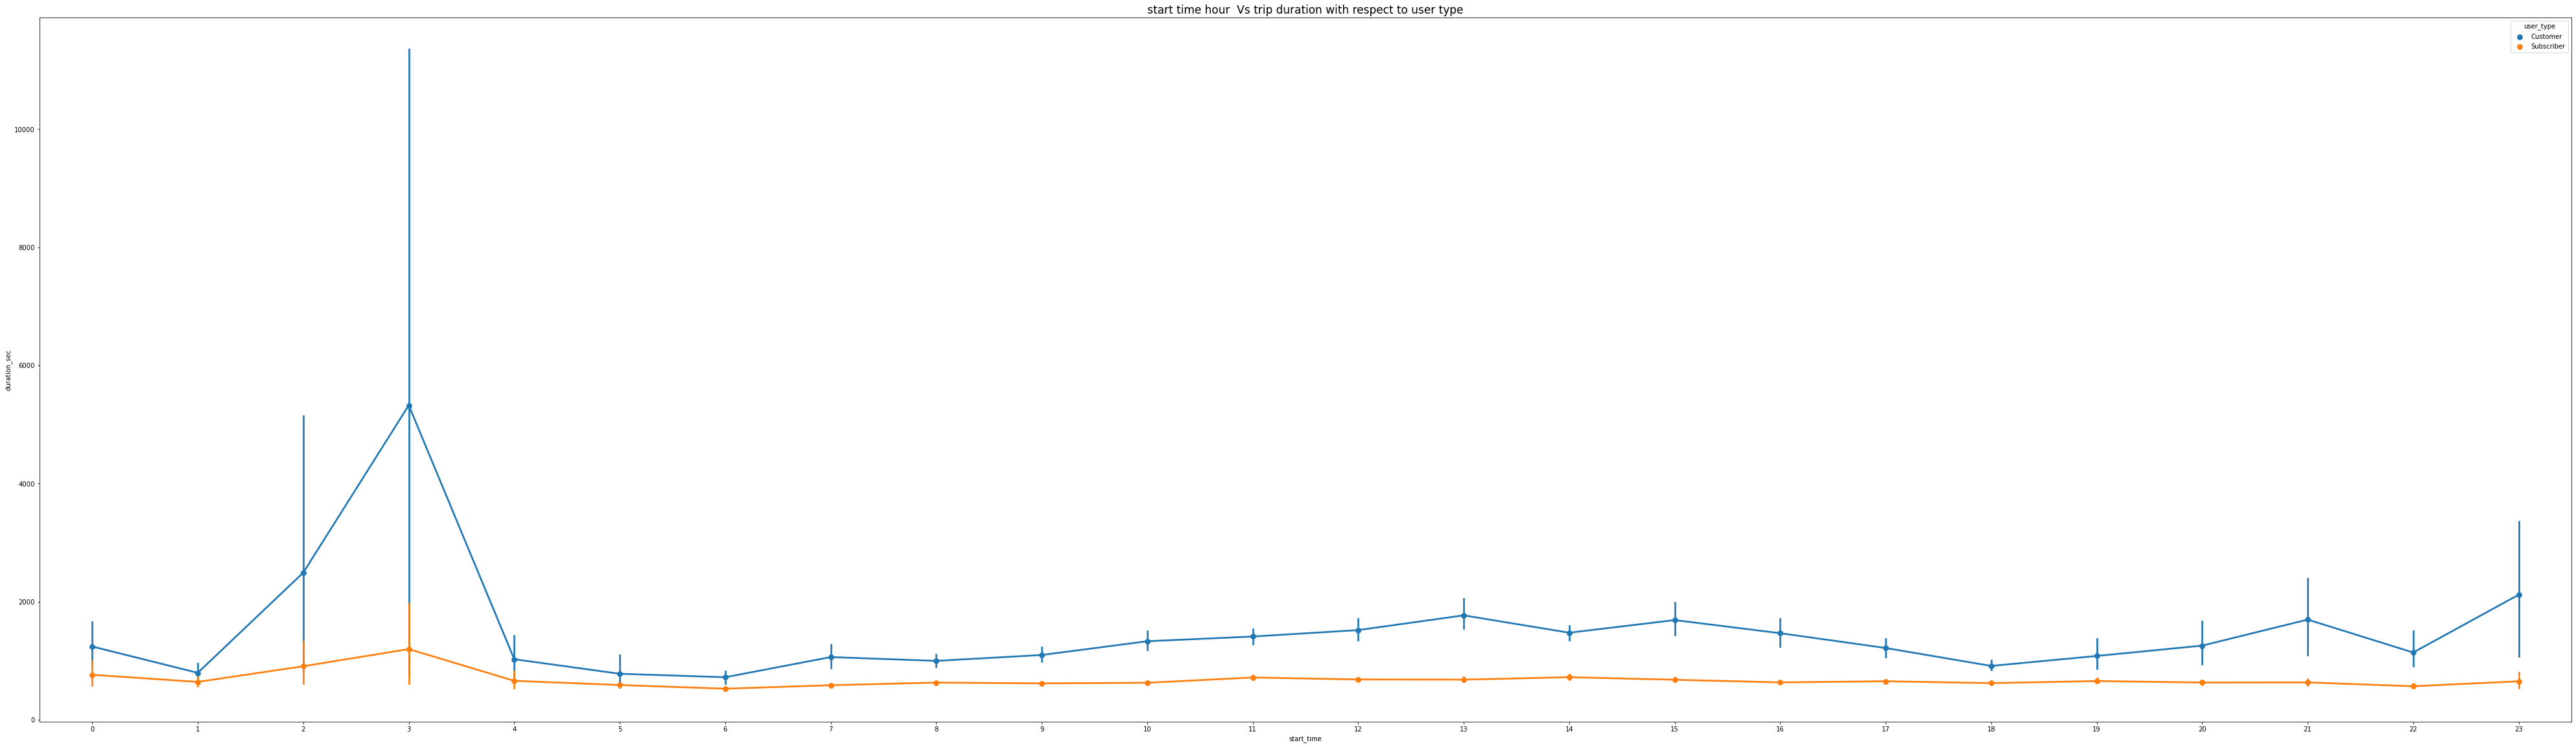

In [6]:
plt.figure(figsize=(70,20));

sb.pointplot(data =bike_data, x = bike_data.start_time.dt.hour, y =bike_data.duration_sec, hue =bike_data.user_type)
plt.title('start time hour  Vs trip duration with respect to user type',fontsize=17);
plt.show();


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## (conclusion)

### using the "Ford bike data set " we can coclude that  :

>most common member age lies between 25 and 35 years old members and and there is a few above 60 Years old

>Males are the dominant gender

>males tends to be subscribers compared to females

>the customers are always have higher trip duration than (subscribers) trip duration has a strong relationship with member type if we compare the types w.r.t the start hour ,Customers always tends to have greater trip duration than subscribers

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt